In [1]:
import csv
from tensorflow.keras import layers, regularizers
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 指定每个路径

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/'

# 分类数设定

In [3]:
NUM_CLASSES = 5

# 输入长度

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 加载学习数据

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# 模型构建

In [8]:
model=None
choice=1 # 0: simple model, 1: complex model
modelName = 'point_history_classifier'+str(choice)
if choice == 0:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
elif choice == 1:  
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

f:\anaconda3\envs\MediaPipe\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,861 (7.27 KB)

 Trainable params: 1,765 (6.89 KB)

 Non-trainable params: 96 (384.00 B)

In [10]:
model_save_path=model_save_path+modelName+".keras"
# 模型检查点回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 提前中止回调
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# 模型编译
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 模型训练

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 944ms/step - accuracy: 0.1094 - loss: 2.0201
Epoch 1: saving model to model/point_history_classifier/point_history_classifier1.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1575 - loss: 1.9588 - val_accuracy: 0.0725 - val_loss: 1.6018
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3203 - loss: 1.5944
Epoch 2: saving model to model/point_history_classifier/point_history_classifier1.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3086 - loss: 1.6273 - val_accuracy: 0.3588 - val_loss: 1.5747
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4531 - loss: 1.3641
Epoch 3: saving model to model/point_history_classifier/point_history_classifier1.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4136 - loss: 1.4411 - val_accuracy: 0.4771 - val_loss: 1.5509
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3750 - loss: 1.4187
Epoch 4: saving model to model/point_history_classifi

In [13]:
# 加载已保存的模型
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推理测试
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[6.7181285e-03 3.5176551e-04 1.9537050e-03 9.9078947e-01 1.8700484e-04]
3


# 混淆矩阵

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


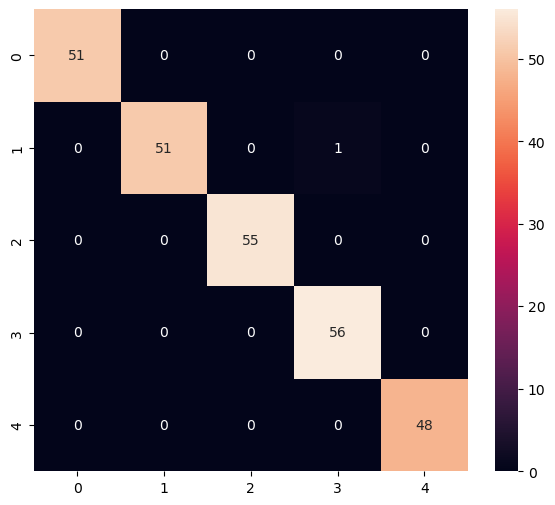

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      0.98      0.99        52
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      1.00      1.00        48

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 转换为 Tensorflow-Lite 模型

In [16]:
# 保存为仅推理模型
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = model_save_path.replace('.keras', '.tflite')

In [18]:
# 变换模型（量化模型）
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\18208\AppData\Local\Temp\tmp_x2ybj4b\assets


INFO:tensorflow:Assets written to: C:\Users\18208\AppData\Local\Temp\tmp_x2ybj4b\assets


Saved artifact at 'C:\Users\18208\AppData\Local\Temp\tmp_x2ybj4b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  3106214854288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219378256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219378832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219377488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219378640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219377296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219378448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219381328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219381520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219380752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3106219379600: 

6320

# 推理测试

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

f:\anaconda3\envs\MediaPipe\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [20]:
# 获取输入/输出张量
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推理实现
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.4641037e-03 3.5148981e-04 1.9191013e-03 9.9108046e-01 1.8486459e-04]
3
